In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_set = pd.read_csv("../data/ml-100K/testing_set_seed123_ml100k.csv",sep=",",
    header=None,
    names=["userID", "itemID", "Rating"],)
test_set


,userID,itemID,Rating
0,101,450,4
1,101,365,2
2,101,285,4
3,101,310,3
4,101,460,4
...,...,...,...
20234,724,710,3
20235,724,130,4
20236,724,280,4
20237,724,175,4


In [3]:
all_users_tp = test_set.groupby('userID')['itemID'].apply(list).tolist()
all_users_tp.__len__()

943

In [4]:
reco_matrix = np.load("../model_reco/vaecf/reco_matrix_vaecf_ml100k_100.npy")


In [5]:
reco_matrix.shape

(943, 100)

In [6]:

from cornac.metrics import RMSE, AUC, NDCG, Precision, Recall,HitRatio

hr=HitRatio(20)
alist=[]
sum_hr=0
for u in range(reco_matrix.shape[0]):
    x=hr.compute(all_users_tp[u],reco_matrix[u][:20])
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_hr=sum_hr+x
    # print(x)
plain_hr=sum_hr/reco_matrix.shape[0]

plain_hr
# 0.5387062566277837


/Users/tahsinalamgirkheya/anaconda3/envs/bbmrec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.5387062566277837

In [7]:
# from NDCG import NDCG
ndcg=NDCG(20)
alist=[]
sum_ndcg=0
for u in range(reco_matrix.shape[0]):
    x=ndcg.compute(all_users_tp[u],reco_matrix[u][:20])
    
    # print(f"x {x} tp {all_users_tp[u]} reco {reco_matrix[u][:20]}")
    # alist.append(x)
    sum_ndcg=sum_ndcg+x
    # print(x)
plain_ndcg=sum_ndcg/reco_matrix.shape[0]

plain_ndcg
# 0.06877010356676778

0.06877010356676778

In [9]:
all_pds =[]
reco_matrix_fair=[]
sens="gender"
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_1.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_2.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_3.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_4.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_5.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_6.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_7.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_8.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_9.npy"))
# reco_matrix_fair.append(np.load(f"../results/vaecf/{sens}_10.npy"))
# all_pds.append(pd.read_csv("../results.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_1.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_2.csv",sep=",",))
# all_pds.append(pd.read_csv("../results/vaecf/gender_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_025.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_050.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_075.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_1.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_125.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_15.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_0_175.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_2.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_3.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_4.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_5.csv",sep=",",))
all_pds.append(pd.read_csv(f"../results/vaecf/new/{sens}_6.csv",sep=",",))
# results/reco_mat_test.npy
for j in range(len(all_pds)):
    reco_m =[]
    for i in range(all_pds[j].__len__()):
        reco_m.append(np.array(all_pds[j].iloc[i][1:]))
    reco_matrix_fair.append(reco_m)
    



In [10]:
# rec=np.load("../results/reco_mat_test.npy")
# reco_matrix_fair.append(rec)


In [11]:
reco_matrix_fair[1][0]

array([289,  49, 357, 157, 489, 189, 645,  89,  60,   1,  95,  52, 133,
        31, 200, 360,  24, 139, 148, 686])

In [18]:

hr=HitRatio(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

hrlist

[0.5418875927889714,
 0.542948038176034,
 0.5440084835630965,
 0.5397667020148462,
 0.5408271474019088,
 0.5418875927889714,
 0.542948038176034,
 0.5418875927889714,
 0.5418875927889714,
 0.5387062566277837,
 0.545068928950159,
 0.5471898197242842]

In [13]:

hr=NDCG(20)
hrlist=[]
for r in reco_matrix_fair:
    sum_hr=0
    for u in range(reco_matrix.shape[0]):
        x=hr.compute(all_users_tp[u],r[u])
        sum_hr=sum_hr+x
    hr_occ=sum_hr/reco_matrix.shape[0]
    hrlist.append(hr_occ)
    

hrlist

[0.06903295466762359,
 0.0687276988857033,
 0.0682801240966518,
 0.06845512981507083,
 0.06780236849032463,
 0.06794562698715684,
 0.06810096289567036,
 0.0681733097790699,
 0.06825044765716551,
 0.06795910415132123,
 0.0702580595095167,
 0.06819120216262173]

In [14]:
reco_matrix_fair[2][0]

array([289,  49, 357, 489, 157, 189, 645,  89,  60,   1,  95,  52, 133,
        31, 200,  24, 360, 139, 148, 686])

In [15]:
xpoints.__len__()

NameError: name 'xpoints' is not defined

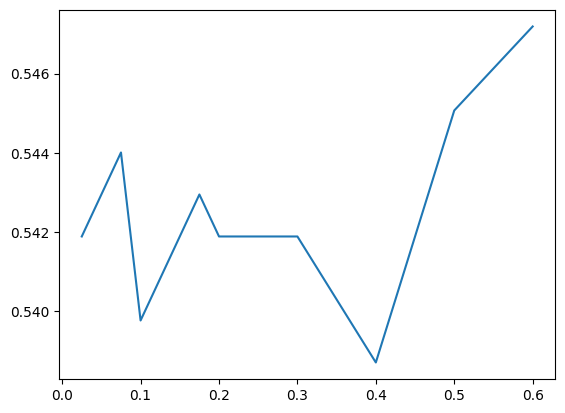

In [19]:
xpoints = [0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.3,0.4,0.5,0.6]
ypoints = hrlist

plt.plot(xpoints, ypoints)
plt.show()

In [21]:
movies = pd.read_csv(
    "../data/ml-100K/i_id_mapping_genre.csv",
    sep="\t",
    names=[
        "item_id",
        "Name",
        "genres",
        "itemID"
    ],
    header=0,
    # encoding="latin-1",
)
movies = movies.drop(columns=["item_id"])
movies = movies.sort_values(by="itemID")
unique_genres = [
    "Action",
    "Thriller",
    "Romance",
    "Western",
    "Children's",
    "Mystery",
    "Fantasy",
    "Film-Noir",
    "Documentary",
    "Comedy",
    "Adventure",
    "Sci-Fi",
    "Horror",
    "Crime",
    "Musical",
    "War",
    "Animation",
    "Drama",
]
for genre in unique_genres:
    movies[genre] = 0
    
for index, row in movies.iterrows():
    genres = row["genres"].split("|")

    for genre in genres:
        movies.at[index, genre] = 1


movies

users = pd.read_csv("../data/ml-100k/u_id_mapping_demographic_.csv", sep="\t")
users = users.sort_values(by="userID")

# users = users.drop(columns=users.columns[0])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
user_features_numpy = users.to_numpy()
users



,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,196,49,0,writer,55105,0,20
185,186,39,1,executive,00000,1,6
21,22,25,0,writer,40206,2,20
243,244,28,0,technician,80525,3,19
165,166,47,0,educator,55113,4,3
...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18
935,936,24,0,other,32789,939,13
929,930,28,1,scientist,07310,940,17
919,920,30,1,artist,90008,941,1


In [22]:
users

,user_id,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,196,49,0,writer,55105,0,20
185,186,39,1,executive,00000,1,6
21,22,25,0,writer,40206,2,20
243,244,28,0,technician,80525,3,19
165,166,47,0,educator,55113,4,3
...,...,...,...,...,...,...,...
938,939,26,1,student,33319,938,18
935,936,24,0,other,32789,939,13
929,930,28,1,scientist,07310,940,17
919,920,30,1,artist,90008,941,1


In [23]:
# age_map = { 0:  "Under 18",
# 	 1:  "18-24",
# 	 2:  "25-34",
# 	 3:  "35-44",
# 	 4:  "45-49",
# 	 5:  "50-55",
# 	 6:  "56+"} #we will follow the same age amp for all dataset
from metrics.utils import map_age
users["Age_Code"] = users["Age"].apply(map_age)
users


ModuleNotFoundError: No module named 'metrics'

In [24]:
pwd

'/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes/metrics'

In [25]:
import os
os.chdir("/Users/tahsinalamgirkheya/Desktop/work/reranking_fairnes")


In [26]:
reco_matrix[0].__len__()

100

In [27]:
from mymetrics.GenrePrecisionMulti import GenrePrecisionMulti
####Import Metrics####
# from mymetrics.GenrePrecision import GenrePrecision

top_k = 20
###intialize them
gp = GenrePrecisionMulti(users, unique_genres, top_k)

In [28]:
reco_matrix[0].shape
# new_rmatrix = np.
new_rmatrix = np.zeros(( 943, 20), dtype=int)
for i in range(943):
    new_rmatrix[i]=reco_matrix[i][:20]
new_rmatrix.shape


(943, 20)

In [41]:
gp_plain = gp.compute(new_rmatrix, movies, "Gender")
gp_plain

(0.051574973119749255,
 array([0.00343256, 0.0071116 , 0.00235703, 0.00010625, 0.00170081,
        0.0050048 , 0.00035689, 0.0007444 , 0.        , 0.00460946,
        0.00854352, 0.00743106, 0.00369164, 0.00259914, 0.0005497 ,
        0.00057268, 0.00040642, 0.00235701]))

In [30]:
(0.0891543564230131-0.0726653727698504)/0.0891543564230131


0.18494871495596887

In [34]:
i=0
xlist=[]
for r in reco_matrix_fair:
    i=i+1
    x=gp.compute(np.array(r), movies, "Gender")
    xlist.append(x[0])
    # print(x)
    print(f"{x[0]} is the bias score for b={xpoints[i-1]}")


0.05174345306434866 is the bias score for b=0.025
0.04874902957738779 is the bias score for b=0.05
0.045149107940152686 is the bias score for b=0.075
0.04386276492992912 is the bias score for b=0.1
0.0370959579392415 is the bias score for b=0.2
0.04525984546133805 is the bias score for b=0.3
0.06648759863685234 is the bias score for b=0.4
0.0841341096714231 is the bias score for b=0.5
0.09587698868295891 is the bias score for b=0.6


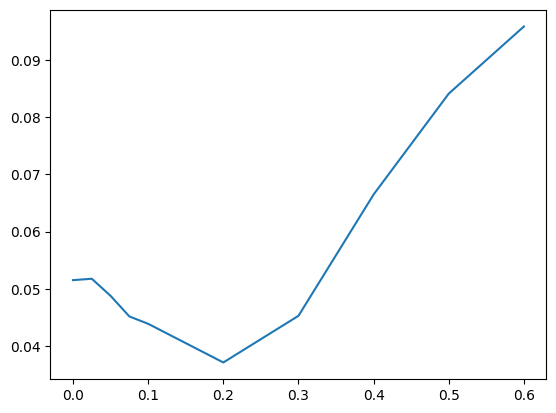

In [42]:
xpoints = [0,0.025,0.05,0.075,0.1,0.2,0.3,0.4,0.5,0.6]
ypoints = [0.0515]+xlist

plt.plot(xpoints, ypoints)
plt.show()

In [43]:
(0.051574973119749255-0.0370959579392415)/0.051574973119749255

0.2807372317362081

In [ ]:
0.05191576002770031 is the bias score for b=0.1
0.05671085050935802 is the bias score for b=0.2
0.053943241667122235 is the bias score for b=0.3

In [ ]:
occ
0.14814030434003325 is the bias score for b=0.1
0.138774267701761 is the bias score for b=0.2
0.12251404848859358 is the bias score for b=0.3
0.10578634427741243 is the bias score for b=0.4
0.053056267841701796 is the bias score for b=0.6

NameError: name 'occ' is not defined

In [38]:
for i in range(5):
    print(.1+0.025*i)
    
# user 0 u_calibrate [289, 49, 357, 489, 189, 60, 24, 157, 1, 89, 360, 645, 95, 52, 133, 148, 31, 139, 101, 200]


0.1
0.125
0.15000000000000002
0.17500000000000002
0.2


In [32]:
reco_matrix_fair[3][0]

array([289,  49, 357, 489, 157, 189,  60,   1,  89,  24, 645, 360,  95,
        52, 133,  31, 148, 139, 200, 101])

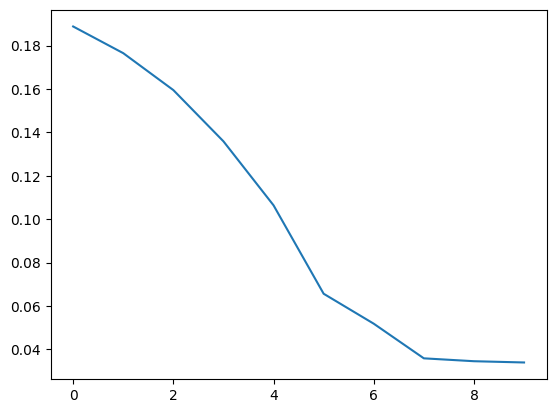

In [23]:
xpoints = list(range(len(hrlist)))
ypoints = xlist

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of past gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ","l=.29 b=.69", "l=.49 b=.49" , "l=.69 b=.29" ,"plain"], 
    ["Hitratio@10",  round(hrl29b69,4),round(hrl49b49,4), round(hrl69b29,4),round(plain_hr,4)],                              
    ["Gender Bias", round(sum(abs(gp_1)),4),round(sum(abs(gp_2)),4),round(sum(abs(gp_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15}".format(*row))
    
print("+"*50)
print("for equation \n (1 - l - b) * sum of scores for selected items (reco)\n - l * kl div of past genre prop x reco genre prop\n - b * kl div of recommended gender genre prop x reco genre prop)")
print("+"*50)
data = [
    ["      ", "l=.49 b=.49" , "l=.69 b=.29" , "l=.29 b=.29" ,"plain"], 
    ["Hitratio@10",round(hr_recol49b49,4), round(hr_recol69b29,4),round(hr_recol29b29,4),round(plain_hr,4)],                              
    ["Gender Bias",round(sum(abs(gp_reco_1)),4),round(sum(abs(gp_reco_2)),4),round(sum(abs(gp_reco_3)),4), 0.1561],                         
]


print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*data[0]))  
print("-" * 50)                                      
for row in data[1:]:                                
    print("{:<12} {:<15} {:<15} {:<15} {:<15} ".format(*row))



++++++++++++++++++++++++++++++++++++++++++++++++++
for equation 
 (1 - l - b) * sum of scores for selected items (reco)
 - l * kl div of past genre prop x reco genre prop
 - b * kl div of past gender genre prop x reco genre prop)
++++++++++++++++++++++++++++++++++++++++++++++++++


NameError: name 'hrl29b69' is not defined